Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Umbrella Red Rose

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

from matplotlib.font_manager import FontProperties

## Rose Curve

* As we can see, when we are adjusting the values of `n` and `d` to influence k, we can get different types of rose! 💖
  * Find a list of examples in wiki: https://en.wikipedia.org/wiki/Rose_(mathematics)
* Rose curve is not only used in engineering such as engine design, but can be seen in our daily life 😉
  * Have you noticed this in your coffee cup before? https://www.google.com/search?tbm=isch&q=cardioid+coffee+cup

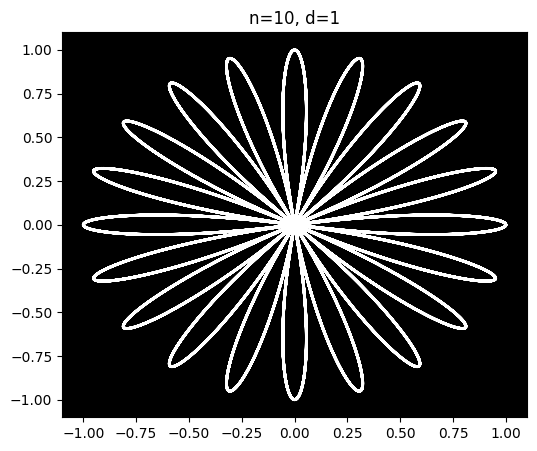

In [4]:
theta = np.arange (0.0, 12 * np.pi, 0.01)
a_scale = 1  # controls x, y value range

n = 10
d = 1
k = n/d
x = a_scale * np.cos(k*theta) * np.cos(theta)
y= a_scale * np.cos(k*theta) * np.sin(theta)

plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_facecolor('black')
plt.plot(x, y, color="white", linewidth="2")
plt.title(f'n={n}, d={d}')
plt.show()

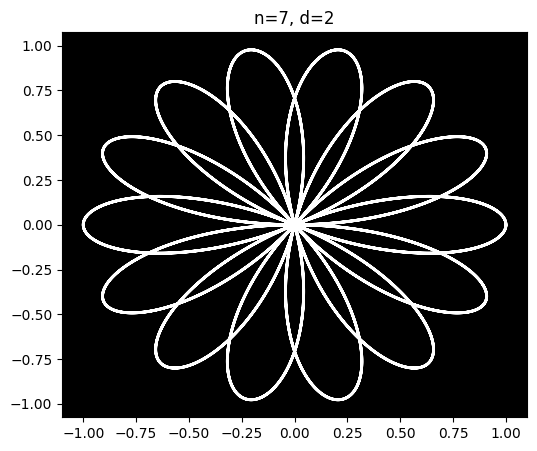

In [5]:
n = 7
d = 2
k = n/d
x = a_scale * np.cos(k*theta) * np.cos(theta)
y= a_scale * np.cos(k*theta) * np.sin(theta)

plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_facecolor('black')
plt.plot(x, y, color="white", linewidth="2")
plt.title(f'n={n}, d={d}')
plt.show()

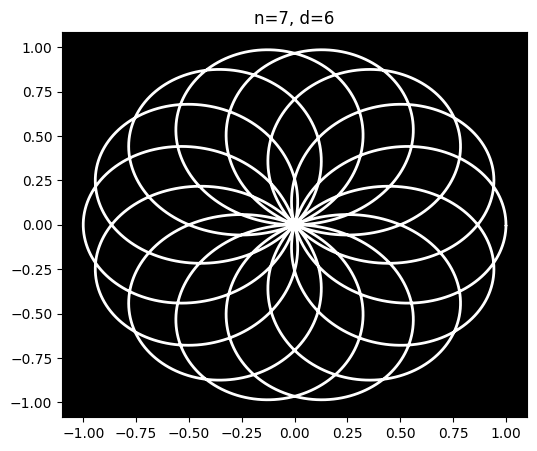

In [6]:
n = 7
d = 6
k = n/d
x = a_scale * np.cos(k*theta) * np.cos(theta)
y= a_scale * np.cos(k*theta) * np.sin(theta)

plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_facecolor('black')
plt.plot(x, y, color="white", linewidth="2")
plt.title(f'n={n}, d={d}')
plt.show()

## Rusty Rain & Rose

* To create the effect of rusty rain, Gamma Distribution curevs looked easier to use 😉
* scipy code: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html, it has 3 params:
  * `loc` moves the curve left and right
  * `a` controls the peak of the curve
  * `scale` controls the overall scale in y-axis direction

In [9]:
def draft_plot(args_lst):
    fig = plt.figure(figsize=(12,5))
    ax1=fig.add_subplot(1,2,1) 
    ax2=fig.add_subplot(1,2,2)
    ax2.set_facecolor('black')

    theta = np.arange (0.0, 12 * np.pi, 0.01)
    a_scale = 1
    n = 7
    d = 2
    k = n/d
    x0 = a_scale * np.cos(k*theta) * np.cos(theta)
    y0 = a_scale * np.cos(k*theta) * np.sin(theta)
    ax2.plot(x0 + 3, y0/20-0.45, 'white')

    dist_type = 'gamma'
    ppf = gamma.ppf
    pdf = gamma.pdf
    interval = 5

    for args in args_lst:

        x = np.linspace(ppf(0.01, *args),
                        ppf(0.99, *args), 100)

        ax1.plot(x, -pdf(x, *args), color='r', lw=2, alpha=0.7, label=dist_type + f' pdf ({args})')

        ax2.plot(x[::interval], -pdf(x, *args)[::interval], 'r*', lw=5, alpha=0.7, label=dist_type + f' pdf ({args})')

    plt.xlim([-2, 8])
    plt.show()

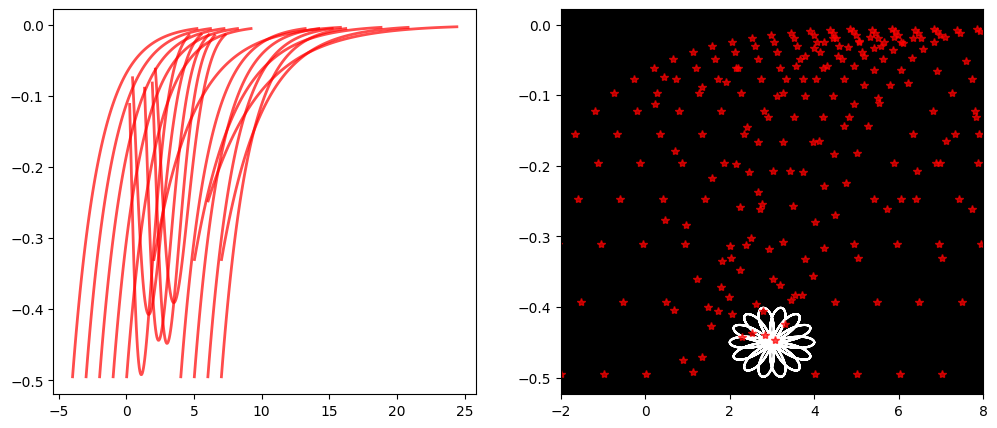

In [10]:
args_lst = [[1, 0, 2], [1, -1, 2], [1, -2, 2], [1, -3, 2], [1, -4, 2], 
            [3, 0, 0.55], [4, 0, 0.55], [3.5, 1, 0.55], [4, 1.5, 0.5], [5, 1.5, 0.5],
           [1, 2, 3], [1, 4, 2], [1, 5, 3], [1, 5, 2], [1, 6, 4], [1, 6, 2], [1, 7, 3], [1, 7, 2]]

draft_plot(args_lst)

In [11]:
def rusty_rain_plot(args_lst):
    plt.figure(figsize=(6, 5))
    ax = plt.axes()
    ax.set_facecolor('black')

    theta = np.arange (0.0, 12 * np.pi, 0.01)
    a_scale = 1
    n = 7
    d = 2
    k = n/d
    x0 = a_scale * np.cos(k*theta) * np.cos(theta)
    y0 = a_scale * np.cos(k*theta) * np.sin(theta)
    ax.plot(x0 + 3, y0/20-0.45, 'white')

    dist_type = 'gamma'
    ppf = gamma.ppf
    pdf = gamma.pdf
    interval = 5

    for args in args_lst:

        x = np.linspace(ppf(0.01, *args),
                        ppf(0.99, *args), 100)

        ax.plot(x[::interval], -pdf(x, *args)[::interval], 'r*', lw=5, alpha=0.7, label=dist_type + f' pdf ({args})')

    plt.xlim([-2, 8])
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                    labelleft=False, labelbottom=False)
    plt.title('Rusty Rain Flower', fontsize=18)
    plt.show()

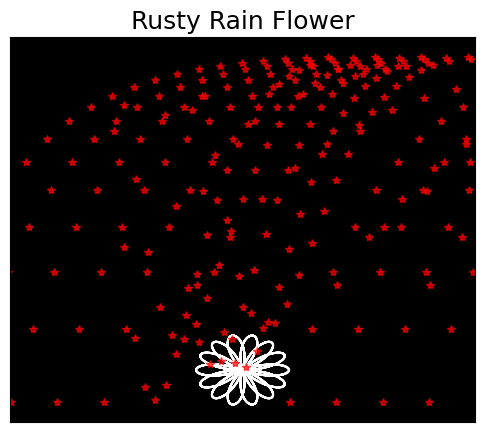

In [13]:
args_lst = [[1, 0, 2], [1, -1, 2], [1, -2, 2], [1, -3, 2], [1, -4, 2], 
            [3, 0, 0.55], [4, 0, 0.55], [3.5, 1, 0.55], [4, 1.5, 0.5], [5, 1.5, 0.5],
           [1, 2, 3], [1, 4, 2], [1, 5, 3], [1, 5, 2], [1, 6, 4], [1, 6, 2], [1, 7, 3], [1, 7, 2]]

rusty_rain_plot(args_lst)

## Umbrella White Rose

In [14]:
def points2line(x1, y1, x2, y2):
    """
    Given 2 points and return the slope (a) and the intercept (b) of linear function `y = ax + b`
    """
    
    a = (y1 - y2) / (x1 - x2)
    b = y1 - (y1 - y2)*x1/(x1 - x2)
    
    return a, b

In [21]:
def rusty_rain_umbrella_plot(args_lst, x_lst, y_lst):
    plt.figure(figsize=(6,5))
    ax = plt.axes()
    ax.set_facecolor('black')

    theta = np.arange (0.0, 12 * np.pi, 0.01)
    a_scale = 1
    n = 7
    d = 2
    k = n/d
    x0 = a_scale * np.cos(k*theta) * np.cos(theta)
    y0 = a_scale * np.cos(k*theta) * np.sin(theta)
    ax.plot(x0 + 3, y0/20-0.45, 'white')

    dist_type = 'gamma'
    ppf = gamma.ppf
    pdf = gamma.pdf
    interval = 5
    
    lf_a1, lf_b1 = points2line(x_lst[0], y_lst[0], x_lst[1], y_lst[1])
    lf_a2, lf_b2 = points2line(x_lst[1], y_lst[1], x_lst[2], y_lst[2])

    for args in args_lst:

        x = np.linspace(ppf(0.01, *args),
                        ppf(0.99, *args), 100)
        
        x_plot_lst = x[::interval]
        y_plot_lst = -pdf(x, *args)[::interval]
        modified_y_plot_lst = y_plot_lst
        
        for k in range(len(x_plot_lst)):
            tmp_x = x_plot_lst[k]
            tmp_y = y_plot_lst[k]
            if (tmp_x < x_lst[0] or tmp_x > x_lst[2]):
                continue
            else:
                if tmp_x < x_lst[1]:
                    new_y = lf_a1 * tmp_x + lf_b1
                    if new_y > tmp_y:
                        modified_y_plot_lst[k] = new_y
                else:
                    new_y = lf_a2 * tmp_x + lf_b2
                    if new_y > tmp_y:
                        modified_y_plot_lst[k] = new_y

        ax.plot(x_plot_lst, modified_y_plot_lst, 'r*', lw=5, alpha=0.7, label=dist_type + f' pdf ({args})')
        
    # plot the umbrella
    plt.plot(x_lst, y_lst, color='r')

    plt.xlim([-2, 8])
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                    labelleft=False, labelbottom=False)
    plt.title('Umbrella White Rose', fontsize=18)
    plt.show()

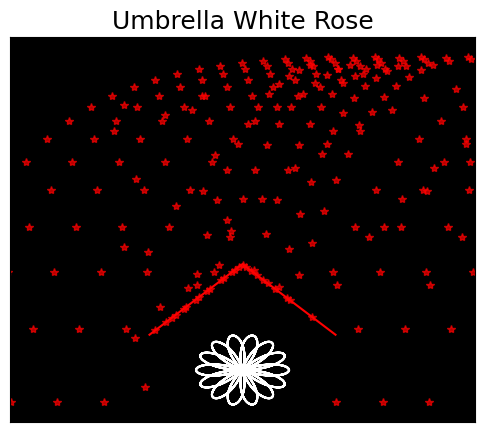

In [22]:
args_lst = [[1, 0, 2], [1, -1, 2], [1, -2, 2], [1, -3, 2], [1, -4, 2], 
            [3, 0, 0.55], [4, 0, 0.55], [3.5, 1, 0.55], [4, 1.5, 0.5], [5, 1.5, 0.5],
           [1, 2, 3], [1, 4, 2], [1, 5, 3], [1, 5, 2], [1, 6, 4], [1, 6, 2], [1, 7, 3], [1, 7, 2]]

x_lst = [1, 3, 5]
y_lst = [-0.4, -0.3, -0.4]

rusty_rain_umbrella_plot(args_lst, x_lst, y_lst)